In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
#Read the data
df=pd.read_csv('/Weather_Data.csv')
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [ ]:
print('The shape of our features is:', df.shape)
df.describe()

The shape of our features is: (3271, 21)


,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


In [ ]:
df.isnull().sum()

,0
Date,0
Temp9am,0
Temp3pm,0
MinTemp,0
MaxTemp,0
Rainfall,0
RainToday,0
Evaporation,0
Sunshine,0
WindGustDir,0


In [ ]:
#Get the feature and label
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['RainToday']=Le.fit_transform(df['RainToday'])
df['WindGustDir']=Le.fit_transform(df['WindGustDir'])
df['WindDir9am']=Le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=Le.fit_transform(df['WindDir3pm'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   int64  
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   int64  
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   int64  
 12  WindDir3pm     3271 non-null   int64  
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [ ]:
X=df.drop('RainToday',axis=1)
y=df['RainToday']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=76)

# Convert 'Date' column to datetime objects in both training and testing sets
x_train['Date'] = pd.to_datetime(x_train['Date'])
x_test['Date'] = pd.to_datetime(x_test['Date'])

# Extract numerical features from the datetime objects (e.g., day, month, year)
# You can customize these features as needed
x_train['Day'] = x_train['Date'].dt.day
x_train['Month'] = x_train['Date'].dt.month
x_train['Year'] = x_train['Date'].dt.year

x_test['Day'] = x_test['Date'].dt.day
x_test['Month'] = x_test['Date'].dt.month
x_test['Year'] = x_test['Date'].dt.year

# Drop the original 'Date' column
x_train = x_train.drop('Date', axis=1)
x_test = x_test.drop('Date', axis=1)

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train=SC.fit_transform(x_train) # Now, x_train contains only numerical features.
x_test=SC.transform(x_test) # Apply the same transformation to x_test.

<ipython-input-47-de76e13aaae9>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_train['Date'] = pd.to_datetime(x_train['Date'])
<ipython-input-47-de76e13aaae9>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x_test['Date'] = pd.to_datetime(x_test['Date'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

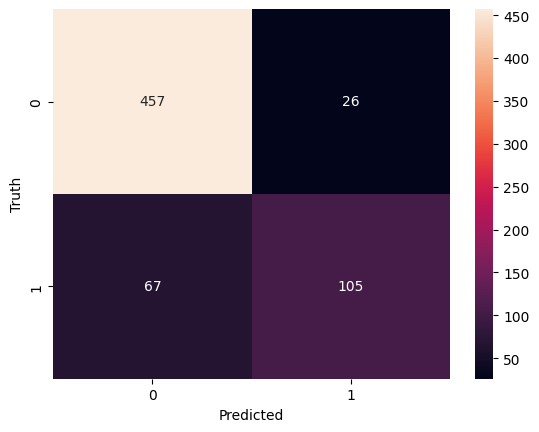

In [ ]:
prediction=RFC.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



In [ ]:
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction))

0.8580152671755725
0.693069306930693


0.8549618320610687
0.6801346801346801


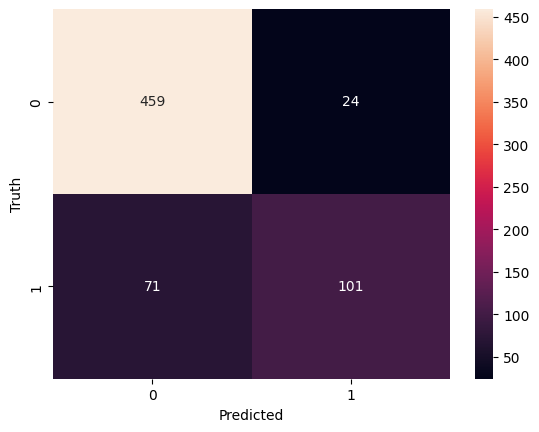

In [ ]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(x_train,y_train)
prediction=SVC.predict(x_test)
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


0.8061068702290076
0.6649076517150396


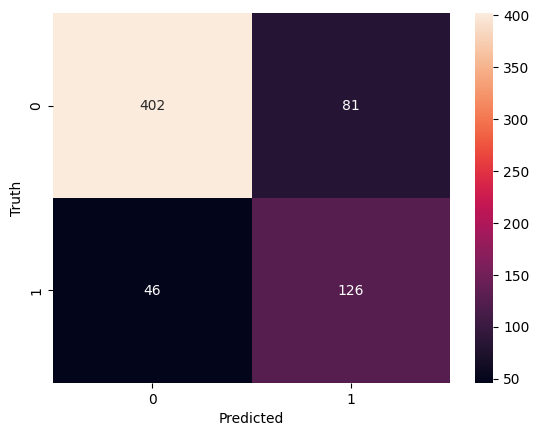

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
prediction=gnb.predict(x_test)
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()